# Proyecciones semánticas con embeddings de palabras

Este cuaderno explica de forma detallada y paso a paso cómo funcionan las **proyecciones semánticas** sobre espacios de embeddings de palabras.  

El objetivo es comprender:

1. Qué significa proyectar palabras en una dimensión semántica.  
2. Cómo se definen dichas dimensiones mediante pares de anclaje.  
3. Cómo se pueden interpretar las posiciones de distintas palabras.  
4. Ejemplos de analogías y sesgos en embeddings.  
5. Cómo aplicar un método de **desbiasado** simple.
6. Ejemplo con embeddings reales

# Qué es la proyección semántica?

Una proyección semántica es el proceso de abstraer carácteristicas interpretables de palabras en el espectro de los word embeddings, con el fin de interpretar similaridades dependientes del contexto.

Por ejemplo los delfines y cocodrilos son similares en tamaño, pero difieren en inteligencia y agresividad.

La pregunta es:


**Pueden estas relaciones dependientes de contexto ser rescatadas apartir de los word embeddings?**

La respuesta es que sí.

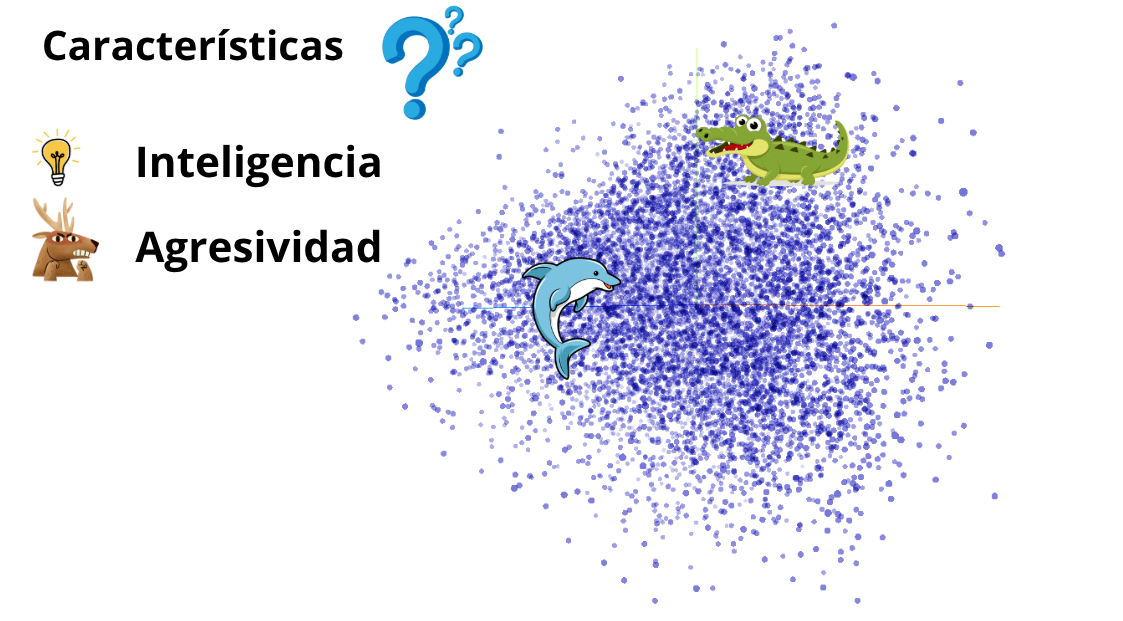

# Explicación gráfica

Esta imágen replica de manera perfecta el proceso de la proyección semántica.

Si quieremos obtener la "proyección" de nuestros word embeddings sobre una cáracteristica en particular, estos serían los pasos:

1. Definir la carácteristica que queremos proyectar, en este caso eligiremos **tamaño**.
2. Tomamos **palabras de anclaje**, esto sería palabras relacionadas con esa carácteristica, pero que sean totalmente opuestas.

Por ejemplo *SMALL* y *LARGE*

3. Definimos la dirección semántica como la dirección que apunta desde una de las palabras de anclaje, hacía otra de las palabras de anclaje.

Si tomamos un par $$(w_a, w_b)$$, la dimensión se define como:

$$
\vec{d} = \vec{w_a} - \vec{w_b}
$$

4. Calcular valor de las palabras en esta nueva dimensión.

Se calcula como el producto punto entre el vector de una palabra dada $$ w $$, en este ejemplo seria el word embedding de alguno de los animales (Horse, Pig, Elephant, ...). Y hacer un producto punto con el vector de la dimensión $$ d $$, en ese caso la simensión de tamaño:

$$
s(w) = \vec{w} \cdot \vec{d}
$$

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41562-022-01316-8/MediaObjects/41562_2022_1316_Fig1_HTML.png)

Fuente: https://www.nature.com/articles/s41562-022-01316-8



## Espacio vectorial simplificado (Datos sínteticos)

Definimos un conjunto reducido de palabras, cada una representada por un vector 2D:

- **Eje X**: se interpretará como una dimensión de **tamaño** (izquierda = pequeño, derecha = grande).  
- **Eje Y**: se interpretará como una dimensión de **género** (abajo = femenino, arriba = masculino).  

Este diseño no es realista, pero permite ilustrar de forma clara cómo se construyen y aplican las proyecciones semánticas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vocabulario con embeddings manuales en 2D
W = {
    "ratón":      np.array([-3.0,  0.0]),
    "gato":       np.array([-2.0,  0.0]),
    "perro":      np.array([-1.0,  0.0]),
    "caballo":    np.array([ 3.0,  0.0]),
    "elefante":   np.array([ 5.0,  0.0]),
    "camión":     np.array([ 4.0,  0.0]),
    "árbol":      np.array([ 2.0,  0.0]),
    "rosa":       np.array([-1.0, -0.3]),
    "grande":     np.array([ 6.0,  0.0]),
    "pequeño":    np.array([-4.0,  0.0]),
    "hombre":     np.array([ 0.0,  1.0]),
    "mujer":      np.array([ 0.0, -1.0]),
    "rey":        np.array([ 1.0,  1.0]),
    "reina":      np.array([ 1.0, -1.0]),
    "abuelo":     np.array([ 0.0,  0.7]),
    "abuela":     np.array([ 0.0, -0.7]),
    "médico":     np.array([ 0.5,  0.5]),
    "enfermera":  np.array([ 0.0, -0.7]),
    "profesor":   np.array([ 0.3,  0.4]),
    "profesora":  np.array([ 0.3, -0.4]),
}

# Gráfica de embeddings y proyección:



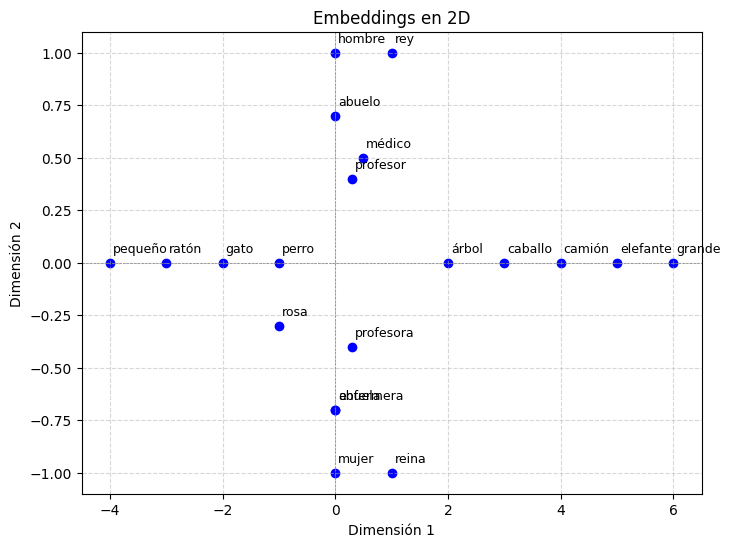

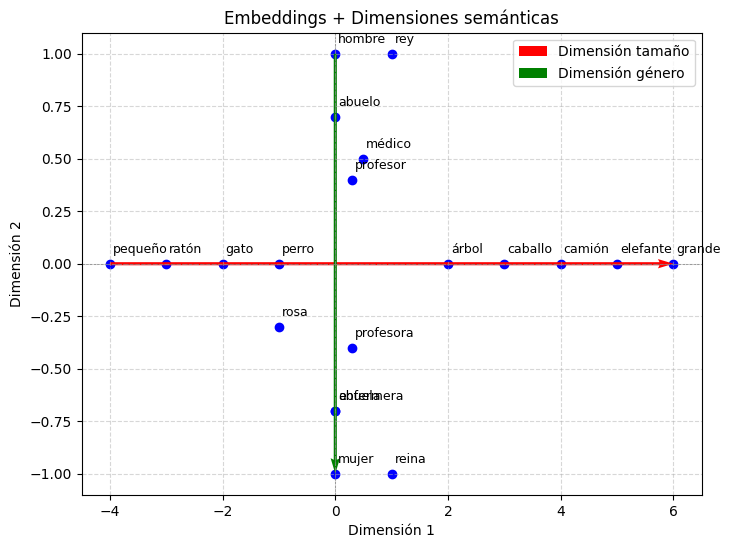

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paso 1: Graficar todos los embeddings ---
plt.figure(figsize=(8,6))
for word, vec in W.items():
    plt.scatter(vec[0], vec[1], color="blue")
    plt.text(vec[0]+0.05, vec[1]+0.05, word, fontsize=9)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("Embeddings en 2D")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Paso 2: Graficar con vectores de dimensiones semánticas ---
plt.figure(figsize=(8,6))
for word, vec in W.items():
    plt.scatter(vec[0], vec[1], color="blue")
    plt.text(vec[0]+0.05, vec[1]+0.05, word, fontsize=9)

# Dibujar dimensión de tamaño (desde 'pequeño' hasta 'grande')
origen_tamaño = np.array(W['pequeño'])
destino_tamaño = np.array(W['grande'])
dx_tamaño = destino_tamaño[0] - origen_tamaño[0]  # Componente x
dy_tamaño = destino_tamaño[1] - origen_tamaño[1]  # Componente y

plt.quiver(origen_tamaño[0], origen_tamaño[1], dx_tamaño, dy_tamaño,
           angles='xy', scale_units='xy', scale=1, color="red", width=0.005, label="Dimensión tamaño")

# Dibujar dimensión de género (desde 'hombre' hasta 'mujer')
origen_genero = np.array(W['hombre'])
destino_genero = np.array(W['mujer'])
dx_genero = destino_genero[0] - origen_genero[0]  # Componente x
dy_genero = destino_genero[1] - origen_genero[1]  # Componente y

plt.quiver(origen_genero[0], origen_genero[1], dx_genero, dy_genero,
           angles='xy', scale_units='xy', scale=1, color="green", width=0.005, label="Dimensión género")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("Embeddings + Dimensiones semánticas")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

En este caso las direcciones de las cáracteristicas de tamaño y genero, resultan tener la misma dirección que los ejes X y Y, sin embargo esto solo es por que los datos sintéticos fueron diseñados así por cuestiones didácticas, en el mundo real los embeddings tendrán dimensiones altas, al igual que los vectores de carácteristicas, y las direcciones de los mismos no serán así de perfectas.

## Definición de dimensiones semánticas

Para construir una dimensión semántica, se seleccionan **pares de palabras opuestas** que actúan como anclas.  
La dimensión se obtiene como el vector diferencia entre los embeddings de dichas palabras.

Ejemplos:  
- **Tamaño**: `grande - pequeño`  
- **Género**: `hombre - mujer`

# Después de la proyección

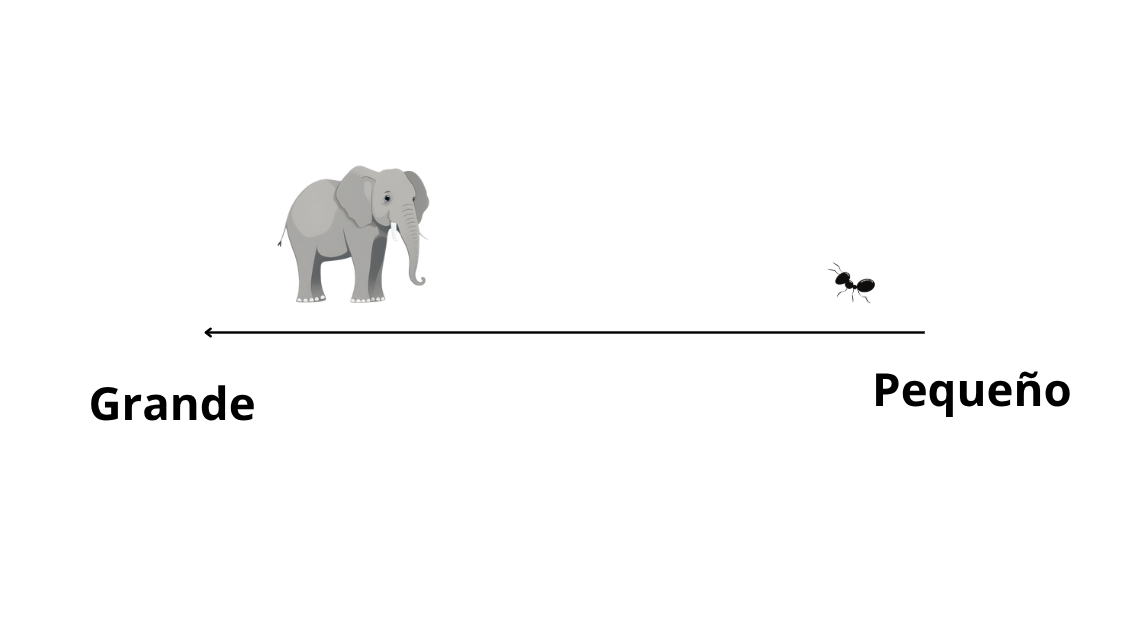

In [ ]:
def build_dimension(pairs):
    diffs = []
    for pos, neg in pairs:
        diffs.append(W[pos] - W[neg])
    return np.mean(diffs, axis=0)

size_dim = build_dimension([("grande", "pequeño")])
gender_dim = build_dimension([("hombre", "mujer")])

print("Dimensión tamaño:", size_dim)
print("Dimensión género:", gender_dim)

Dimensión tamaño: [10.  0.]
Dimensión género: [0. 2.]


## Proyección de palabras en una dimensión

La **proyección** consiste en calcular el producto punto entre el vector de una palabra y la dimensión definida.  
Esto genera un valor escalar que indica **qué tan alineada** está la palabra con la dimensión.

- En la dimensión de **tamaño**, un valor alto indica mayor asociación con lo *grande*, y bajo con lo *pequeño*.  
- En la dimensión de **género**, un valor positivo indica mayor asociación con lo *masculino*, y negativo con lo *femenino*.

In [ ]:
def project_score(word, dim, use_cosine=False):
    v = W[word]
    if use_cosine:
        return float(np.dot(v, dim) / (np.linalg.norm(v) * np.linalg.norm(dim) + 1e-12))
    else:
        return float(np.dot(v, dim))

palabras = ["ratón","gato","perro","caballo","elefante","camión","árbol","rosa",
            "hombre","mujer","rey","reina","médico","enfermera","profesor","profesora"]

rows = []
for w in palabras:
    rows.append({
        "palabra": w,
        "proy_tamaño": project_score(w, size_dim),
        "proy_género": project_score(w, gender_dim),
    })

df_proj = pd.DataFrame(rows).sort_values("proy_tamaño")
df_proj

,palabra,proy_tamaño,proy_género
0,ratón,-30.0,0.0
1,gato,-20.0,0.0
2,perro,-10.0,0.0
7,rosa,-10.0,-0.6
8,hombre,0.0,2.0
9,mujer,0.0,-2.0
13,enfermera,0.0,-1.4
14,profesor,3.0,0.8
15,profesora,3.0,-0.8
12,médico,5.0,1.0


## Visualización del espacio vectorial

Se representa el espacio 2D con cada palabra ubicada según sus coordenadas.  

- Eje X = tamaño  
- Eje Y = género

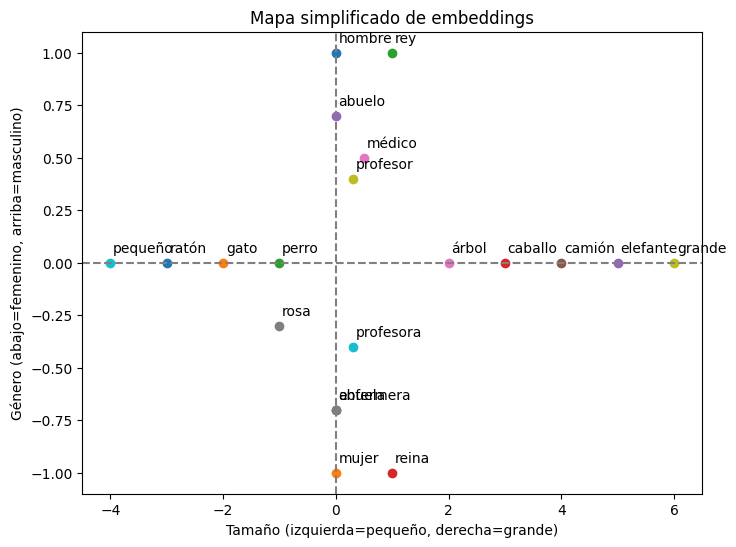

In [ ]:
plt.figure(figsize=(8, 6))
for w, v in W.items():
    plt.scatter(v[0], v[1])
    plt.annotate(w, (v[0]+0.05, v[1]+0.05))
plt.axhline(0, linestyle="--", color="gray")
plt.axvline(0, linestyle="--", color="gray")
plt.xlabel("Tamaño (izquierda=pequeño, derecha=grande)")
plt.ylabel("Género (abajo=femenino, arriba=masculino)")
plt.title("Mapa simplificado de embeddings")
plt.show()

## Analogías

Un ejemplo clásico es:

`rey` - `hombre` + `mujer` = `reina`


Esto funciona porque la diferencia entre *hombre* y *mujer* captura una dimensión de género que también se aplica a otras palabras.

In [ ]:
def nearest_neighbors(query_vec, k=5, exclude=[]):
    sims = []
    for w, v in W.items():
        if w in exclude:
            continue
        num = float(np.dot(query_vec, v))
        den = np.linalg.norm(query_vec)*np.linalg.norm(v) + 1e-12
        sims.append((w, num/den))
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:k]

query = W["rey"] - W["hombre"] + W["mujer"]
nearest_neighbors(query, k=5, exclude=["rey","hombre","mujer"])

[('reina', 0.9999999999994997),
 ('profesora', 0.9899494936597665),
 ('grande', 0.7071067811864641),
 ('elefante', 0.7071067811864475),
 ('camión', 0.7071067811864225)]

## Sesgos y desbiasado

Los embeddings pueden reflejar sesgos presentes en los datos de entrenamiento.  
Por ejemplo, ciertas profesiones pueden aparecer más asociadas a un género.

Un método sencillo para reducir el sesgo es **eliminar el componente en la dirección de la dimensión de sesgo** (en este caso, género).

In [ ]:
def debias_vector(v, dim):
    dim_unit = dim / (np.linalg.norm(dim) + 1e-12)
    comp = np.dot(v, dim_unit) * dim_unit
    return v - comp

# Ejemplo: debiasar "médico" y "enfermera"
W_debias = {w: v.copy() for w,v in W.items()}
for w in ["médico","enfermera"]:
    W_debias[w] = debias_vector(W[w], gender_dim)

def top5(Wmap, palabra):
    v = Wmap[palabra]
    sims = []
    for w,u in Wmap.items():
        if w == palabra:
            continue
        num = float(np.dot(v,u))
        den = np.linalg.norm(v)*np.linalg.norm(u) + 1e-12
        sims.append((w, num/den))
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:5]

pd.DataFrame({
    "médico (antes)": [f"{w} ({s:.2f})" for w,s in top5(W,"médico")],
    "médico (desbiasado)": [f"{w} ({s:.2f})" for w,s in top5(W_debias,"médico")],
    "enfermera (antes)": [f"{w} ({s:.2f})" for w,s in top5(W,"enfermera")],
    "enfermera (desbiasada)": [f"{w} ({s:.2f})" for w,s in top5(W_debias,"enfermera")],
})

,médico (antes),médico (desbiasado),enfermera (antes),enfermera (desbiasada)
0,rey (1.00),grande (1.00),mujer (1.00),mujer (0.41)
1,profesor (0.99),elefante (1.00),abuela (1.00),reina (0.35)
2,grande (0.71),camión (1.00),profesora (0.80),abuela (0.33)
3,elefante (0.71),caballo (1.00),reina (0.71),profesora (0.21)
4,camión (0.71),árbol (1.00),rosa (0.29),rosa (0.12)


# Aplicación con embeddings reales

In [1]:
%pip install gensim

Descargamos embeddings de Glove, en este caso los embeddings son mas bien livianos, con solo 50 dimensiones

In [2]:
# Install: pip install gensim
import gensim.downloader as api

# Load pre-trained Word2Vec model
model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [3]:
# Get vector for a word
vector = model['king']
print(f"Vector shape: {vector.shape}")

Vector shape: (25,)


# Similaridad de palabras

Aquí vemos cuales son los vectores más similares a la palabra rey, podemos ver que son princípe y reina.

In [4]:
# Find similar words
similar = model.most_similar('king', topn=5)
print(similar)

[('prince', 0.9337409734725952), ('queen', 0.9202421307563782), ('aka', 0.9176921844482422), ('lady', 0.9163240790367126), ('jack', 0.9147354364395142)]


# Analogía

$$ rey - hombre + mujer = reina $$

In [5]:
# Word analogies
result = model.most_similar(positive=['king', 'woman'], negative=['man'])
print(result)

[('meets', 0.8841924071311951), ('prince', 0.832163393497467), ('queen', 0.8257461190223694), ('’s', 0.8174097537994385), ('crow', 0.813499391078949), ('hunter', 0.8131037950515747), ('father', 0.8115834593772888), ('soldier', 0.81113600730896), ('mercy', 0.8082392811775208), ('hero', 0.8082264065742493)]


# Proyección semántica: Tamaño

Como ejemplo ahora en datos reales, vamos a generar proyecciones sobre la dimensión de género, y veremos que implicaciones tiene en los embeddings.


$$
\vec{w_{big}}
$$

In [6]:
model['big']

array([-0.18469 ,  0.39978 , -0.042707, -0.05565 ,  0.44953 ,  0.46044 ,
        1.3342  ,  0.27087 , -0.20495 , -0.52676 , -0.19003 , -0.13644 ,
       -4.5969  , -0.37411 , -0.086688, -0.64449 ,  0.28982 , -0.9522  ,
       -0.61824 ,  0.33503 , -0.45159 ,  0.49904 ,  0.54592 , -0.31448 ,
       -0.12302 ], dtype=float32)

$$
\vec{w_{woman}}
$$

In [7]:
model['small']

array([-0.5094  , -0.1212  , -0.50065 ,  0.13758 ,  0.78631 ,  0.66296 ,
        0.97264 , -1.0935  ,  0.25414 ,  0.24216 ,  0.055835, -0.069459,
       -4.2867  ,  0.14974 , -0.49399 , -0.58944 ,  0.93611 , -0.43676 ,
        0.48494 ,  0.061121, -0.031333, -0.13304 ,  0.12525 , -0.26903 ,
       -0.822   ], dtype=float32)

$$
\vec{d} = \vec{w_{man}} - \vec{w_{woman}}
$$

In [8]:
anchor_1 = "big"
anchor_2 = "small"

In [14]:
semantic_direction = model[anchor_1] - model[anchor_2]
semantic_direction

array([ 0.32471   ,  0.52098   ,  0.457943  , -0.19323   , -0.33678   ,
       -0.20251998,  0.36156005,  1.36437   , -0.45909   , -0.76892   ,
       -0.24586499, -0.066981  , -0.3102002 , -0.52385   ,  0.40730202,
       -0.05505002, -0.64629006, -0.51544   , -1.1031799 ,  0.27390897,
       -0.420257  ,  0.63208   ,  0.42067003, -0.04545   ,  0.69898003],
      dtype=float32)

# Observando comportamiento de palabras con la proyección de género

In [12]:
import numpy as np
import pandas as pd

def find_projection(word_embedding, semantic_direction):
    return (np.dot(word_embedding, semantic_direction) / np.linalg.norm(semantic_direction) * semantic_direction)

words = ["building", "glasses", "whale", "hamster", "alligator", "cow", "chicken", "dog"]
rows = []
for word in words:
    word_embedding = model[word]
    projection = find_projection(word_embedding, semantic_direction)

    rows.append({
        "palabra": word,
        "proyección de genero": projection,
    })

    print(f"{word}: {projection}")

df_proj = pd.DataFrame(rows)
df_proj



building: [-0.35887507 -0.575796   -0.5061264   0.2135611   0.37221503  0.22382855
 -0.39960235 -1.507925    0.50739413  0.84982353  0.27173418  0.07402854
  0.3428386   0.578968   -0.45015717  0.06084222  0.71429086  0.56967306
  1.2192533  -0.3027289   0.4644752  -0.6985856  -0.46493173  0.05023212
 -0.7725247 ]
glasses: [-0.1621429  -0.2601497  -0.22867237  0.09648878  0.16817002  0.10112771
 -0.18054385 -0.6812938   0.22924511  0.38395774  0.1227719   0.03344674
  0.15489748  0.26158282 -0.20338497  0.02748905  0.32272288  0.25738332
  0.55086935 -0.13677557  0.20985399 -0.31562713 -0.21006024  0.02269531
 -0.34903345]
whale: [-0.22016346 -0.3532406  -0.31049955  0.13101594  0.2283473   0.13731483
 -0.24514893 -0.9250852   0.31127727  0.52135164  0.16670409  0.04541519
  0.21032538  0.35518658 -0.2761634   0.03732562  0.4382047   0.3494843
  0.74799025 -0.18571877  0.28494728 -0.42856985 -0.28522733  0.03081651
 -0.47393015]
hamster: [ 0.19125079  0.30685174  0.26972362 -0.11381044

,palabra,proyección de genero
0,building,"[-0.35887507, -0.575796, -0.5061264, 0.2135611..."
1,glasses,"[-0.1621429, -0.2601497, -0.22867237, 0.096488..."
2,whale,"[-0.22016346, -0.3532406, -0.31049955, 0.13101..."
3,hamster,"[0.19125079, 0.30685174, 0.26972362, -0.113810..."
4,alligator,"[-0.20992963, -0.33682096, -0.29606664, 0.1249..."
5,cow,"[-0.02825305, -0.04533052, -0.039845664, 0.016..."
6,chicken,"[0.13789956, 0.22125255, 0.19448166, -0.082061..."
7,dog,"[0.15753181, 0.25275144, 0.22216928, -0.093744..."


# PCA para visualizar:

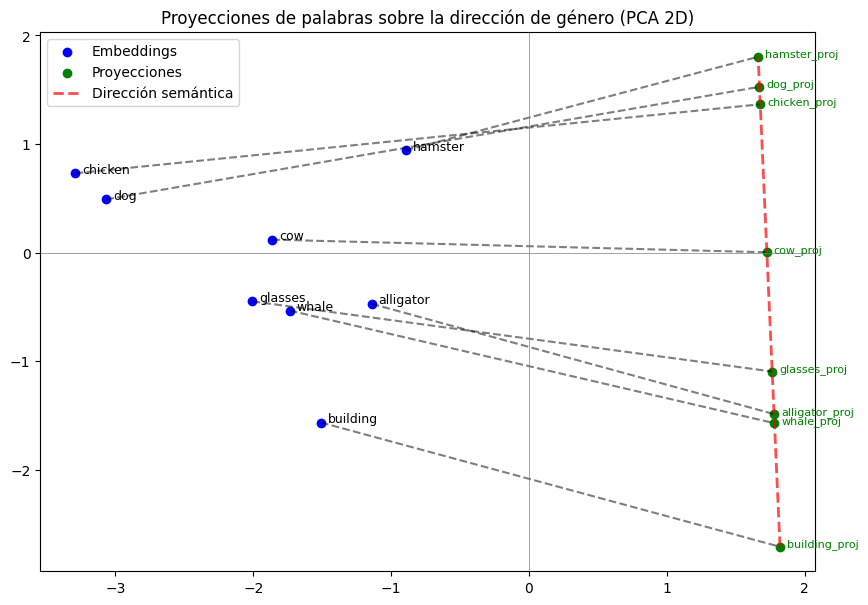

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Embeddings
embeddings = np.array([model[word] for word in words])

# Proyecciones sobre la dirección semántica
projections = np.array([find_projection(model[word], semantic_direction) for word in words])

# PCA para reducir a 2D
pca = PCA(n_components=2)
all_vectors = np.vstack([embeddings, projections, semantic_direction.reshape(1, -1)])
pca_result = pca.fit_transform(all_vectors)

# Separar resultados
embeddings_2d = pca_result[:len(words)]
projections_2d = pca_result[len(words):len(words)*2]
semantic_direction_2d = pca_result[-1]  # vector semántico proyectado en PCA

# ---- Gráfico ----
plt.figure(figsize=(10, 7))

# Puntos de embeddings originales
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color="blue", label="Embeddings")
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0] + 0.05, embeddings_2d[i, 1], word, fontsize=9)

# Puntos de proyecciones
plt.scatter(projections_2d[:, 0], projections_2d[:, 1], color="green", label="Proyecciones")
for i, word in enumerate(words):
    plt.text(projections_2d[i, 0] + 0.05, projections_2d[i, 1], f"{word}_proj", fontsize=8, color="green")

# Líneas desde cada embedding hacia su proyección
for i in range(len(words)):
    plt.plot([embeddings_2d[i, 0], projections_2d[i, 0]],
             [embeddings_2d[i, 1], projections_2d[i, 1]],
             'k--', alpha=0.5)

# Ordenar por el eje Y (columna 1)
projections_2d = projections_2d[projections_2d[:, 1].argsort()]

# Línea punteada desde la primera hasta la última proyección
plt.plot([projections_2d[0, 0], projections_2d[-1, 0]],
         [projections_2d[0, 1], projections_2d[-1, 1]],
         'r--', linewidth=2, alpha=0.7, label="Dirección semántica")

# Estética
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.legend()
plt.title("Proyecciones de palabras sobre la dirección de género (PCA 2D)")
plt.show()

## Conclusiones

- Las **proyecciones semánticas** permiten cuantificar el grado en que una palabra se alinea con una dimensión interpretable.  
- Este método es útil para **analizar propiedades semánticas**, **explicar analogías** y **detectar sesgos** en embeddings.  
- Aunque aquí se ha usado un espacio **simplificado**, la técnica es aplicable a modelos de alta dimensionalidad (ej. Word2Vec, fastText, BERT).  
- Una extensión natural consiste en explorar otras dimensiones (ej. positivo–negativo, moderno–antiguo) y comparar cómo distintos modelos representan estas relaciones.